In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('limits_cms_top_20_001.pcl')
print(recastData['yDM (95% C.L.)'])

0       1.689317
1       2.950021
2       2.800181
3       3.007143
4       2.782332
5       3.340836
6       2.147670
7       2.573479
8       2.692852
9       2.929529
10      3.089987
11      3.223480
12      1.857914
13      2.082872
14      2.229611
15      2.557283
16      2.442315
17      2.555466
18      2.812958
19      1.886716
20      2.154041
21      2.419522
22      2.573995
23      3.069635
24      2.983903
25      2.967004
26      2.951797
27      2.842039
28      2.913527
29      3.085947
30      3.503291
31      3.986631
32      4.029789
33      4.160580
34      4.427161
35      4.480567
36      4.592587
37      4.823760
38      5.065106
39      5.626106
40      5.982518
41      6.311208
42      6.303143
43      6.488523
44      6.525777
45      6.817237
46      6.931323
47      7.626646
48      7.847878
49      8.479784
50      8.816112
51      8.667724
52      8.992836
53      8.875536
54      8.966364
55      9.551549
56      9.869303
57     10.264660
58     10.7926

### Plot limit on yDM

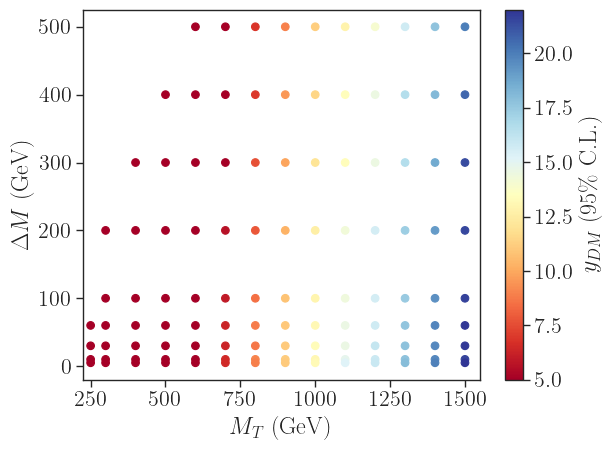

In [3]:
x = recastData['mPsiT']
y = recastData['mSDM']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}$ (95\% C.L.)')
plt.xlabel(r'$M_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(225.,1550.)
# plt.yscale('log')
plt.show()

### Interpolate for a denser grid

In [13]:
# Interpolate to create more points
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([5.,10.,12.,15.,20.])
contoursDict = getContours(xnew,ynew,znew,cValues)

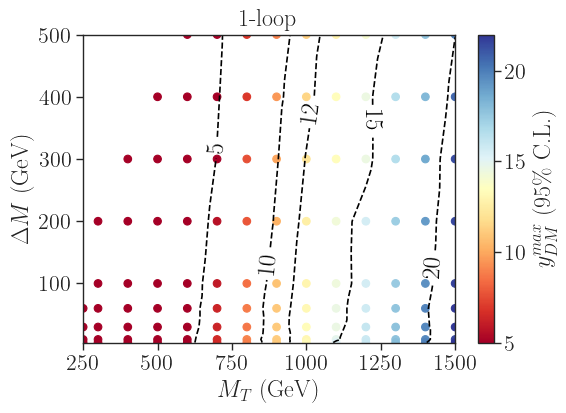

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)

plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$M_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

In [15]:
recastData[recastData['mPsiT'] ==400.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
12,400.0,100.0,1.857914
13,400.0,200.0,2.082872
14,400.0,300.0,2.229611
15,400.0,340.0,2.557283
16,400.0,370.0,2.442315
17,400.0,390.0,2.555466
18,400.0,395.0,2.812958


In [16]:
recastData[recastData['mPsiT'] ==500.][['mPsiT','mSDM','yDM (95% C.L.)']]

,mPsiT,mSDM,yDM (95% C.L.)
19,500.0,100.0,1.886716
20,500.0,200.0,2.154041
21,500.0,300.0,2.419522
22,500.0,400.0,2.573995
23,500.0,440.0,3.069635
24,500.0,470.0,2.983903
25,500.0,490.0,2.967004
26,500.0,495.0,2.951797


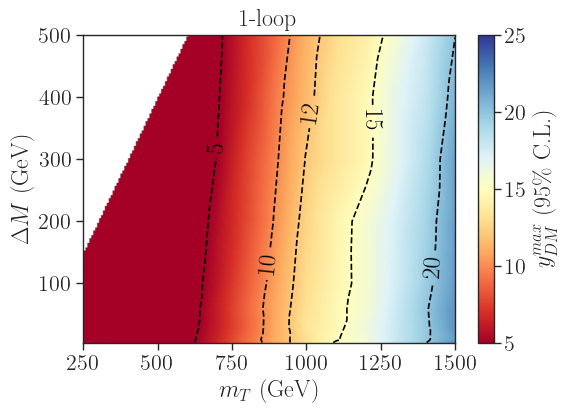

In [17]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=5,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('1-loop')
plt.xlim(250.,1500.)
plt.show()

### Save contour curves to text files

In [18]:
fname = 'CMS_mtt_oneLoop_contours.csv'
saveContours(contoursDict,fname,header='mPsiT_GeV,deltaM_GeV')


Contours saved to CMS_mtt_oneLoop_contours.csv
